In [76]:
import numpy as np

ONE_MIB = 1 << 20

with open('./flash-dumps/new1.bin', 'rb') as f:
    new1b = f.read()[:2 * ONE_MIB]
    new1full = np.frombuffer(new1b, dtype=np.uint8)

with open('./flash-dumps/new2.bin', 'rb') as f:
    new2b = f.read()[:2 * ONE_MIB]
    new2full = np.frombuffer(new2b, dtype=np.uint8)

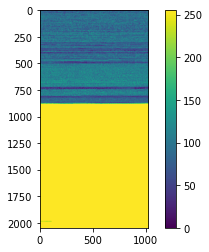

In [77]:
import matplotlib.pyplot as plt

def plot_bin(x: np.array, **imshow_kwargs):
    data = np.reshape(x, (-1, 1024))
    
    plt.imshow(data, **imshow_kwargs)
    

plot_bin(new1full)
plt.colorbar()
plt.show()

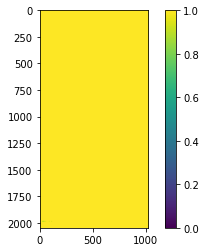

In [78]:
diff_mask = (new1full == new2full)

plot_bin(diff_mask, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [93]:
unshared_data = [(hex(i), hex(a), hex(b)) for i, (a, b) in enumerate(zip(new1full, new2full)) if a != b]
unshared_data

[('0x1f0013', '0x46', '0x42'),
 ('0x1f0015', '0x7c', '0xe8'),
 ('0x1f0016', '0x63', '0xd8'),
 ('0x1f0017', '0x5', '0x7e'),
 ('0x1f0018', '0x4a', '0x62'),
 ('0x1f0019', '0xca', '0xef'),
 ('0x1f001a', '0x54', '0x41'),
 ('0x1f001b', '0xa7', '0x2'),
 ('0x1f001c', '0xe1', '0xff'),
 ('0x1f001d', '0x48', '0x85'),
 ('0x1f001e', '0x67', '0x63'),
 ('0x1f001f', '0x93', '0x84'),
 ('0x1f0020', '0x46', '0x8a'),
 ('0x1f0021', '0xa9', '0xce'),
 ('0x1f0022', '0x19', '0xb6'),
 ('0x1f0023', '0x1c', '0x92'),
 ('0x1f0024', '0x75', '0xe6'),
 ('0x1f0025', '0xdf', '0xdd'),
 ('0x1f0026', '0x8f', '0x2a'),
 ('0x1f0027', '0x5', '0xb9'),
 ('0x1f0028', '0xa3', '0x25'),
 ('0x1f0029', '0x34', '0x60'),
 ('0x1f002a', '0x4b', '0x18'),
 ('0x1f0034', '0x38', '0x39'),
 ('0x1f0035', '0x33', '0x43'),
 ('0x1f0036', '0x46', '0x37'),
 ('0x1f0037', '0x45', '0x34'),
 ('0x1f0054', '0x38', '0x42'),
 ('0x1f0055', '0x41', '0x38'),
 ('0x1f0056', '0x46', '0x42'),
 ('0x1f0057', '0x44', '0x42'),
 ('0x1f006c', '0xc1', '0xa3'),
 ('0x1f006d

In [42]:
import difflib

d = list(difflib.diff_bytes(difflib.unified_diff, [new1b], [new2b], lineterm=b''))

for i in d:
    print(i[:100])

b'--- '
b'+++ '
b'@@ -1 +1 @@'
b'- J\x00\x00$\n?\x80 \x00!\x00"\n?\x80\x00\x08@\x84#J0\x00 "\x0f\x80\x00\x08@ \xc5\xe1u\xeb\xd9\x00\x1e\x00p`\x00\x00\x08\x84&\xabpD\x00\x00\x00\x02&\xabp\x84\xff\xff\xff\xff&\xabp\x04\x00\x00\x00\x00$\n\x0f\x80\x00\x08A\x00%\n\x0f\x80 \x00\x00\x00p\xcf\x00\x00\x1b\x00\xb8"\xe0\x80$\xcap'
b'+ J\x00\x00$\n?\x80 \x00!\x00"\n?\x80\x00\x08@\x84#J0\x00 "\x0f\x80\x00\x08@ \xc5\xe1u\xeb\xd9\x00\x1e\x00p`\x00\x00\x08\x84&\xabpD\x00\x00\x00\x02&\xabp\x84\xff\xff\xff\xff&\xabp\x04\x00\x00\x00\x00$\n\x0f\x80\x00\x08A\x00%\n\x0f\x80 \x00\x00\x00p\xcf\x00\x00\x1b\x00\xb8"\xe0\x80$\xcap'


In [33]:
len(d)

5